In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import koreanize_matplotlib
import folium
import geopandas as gpd

map_df = gpd.read_file('./data/전국지도_5179/')
map_df =  map_df.to_crs('EPSG:4326')
roadkill1 = pd.read_csv('./data/roadkill1.csv')
ecopath = pd.read_csv('./data/ecopath.csv')
cat = pd.read_csv('./data/동물/Felis_catus(고양이).csv')
hydropotes = pd.read_csv('./data/동물/Hydropotes inermis(고라니).csv')
racoon = pd.read_csv('./data/동물/Nyctereutes_procyonoides(너구리).csv')
road = pd.read_csv('./data/도로데이터.csv.csv', encoding='cp949')

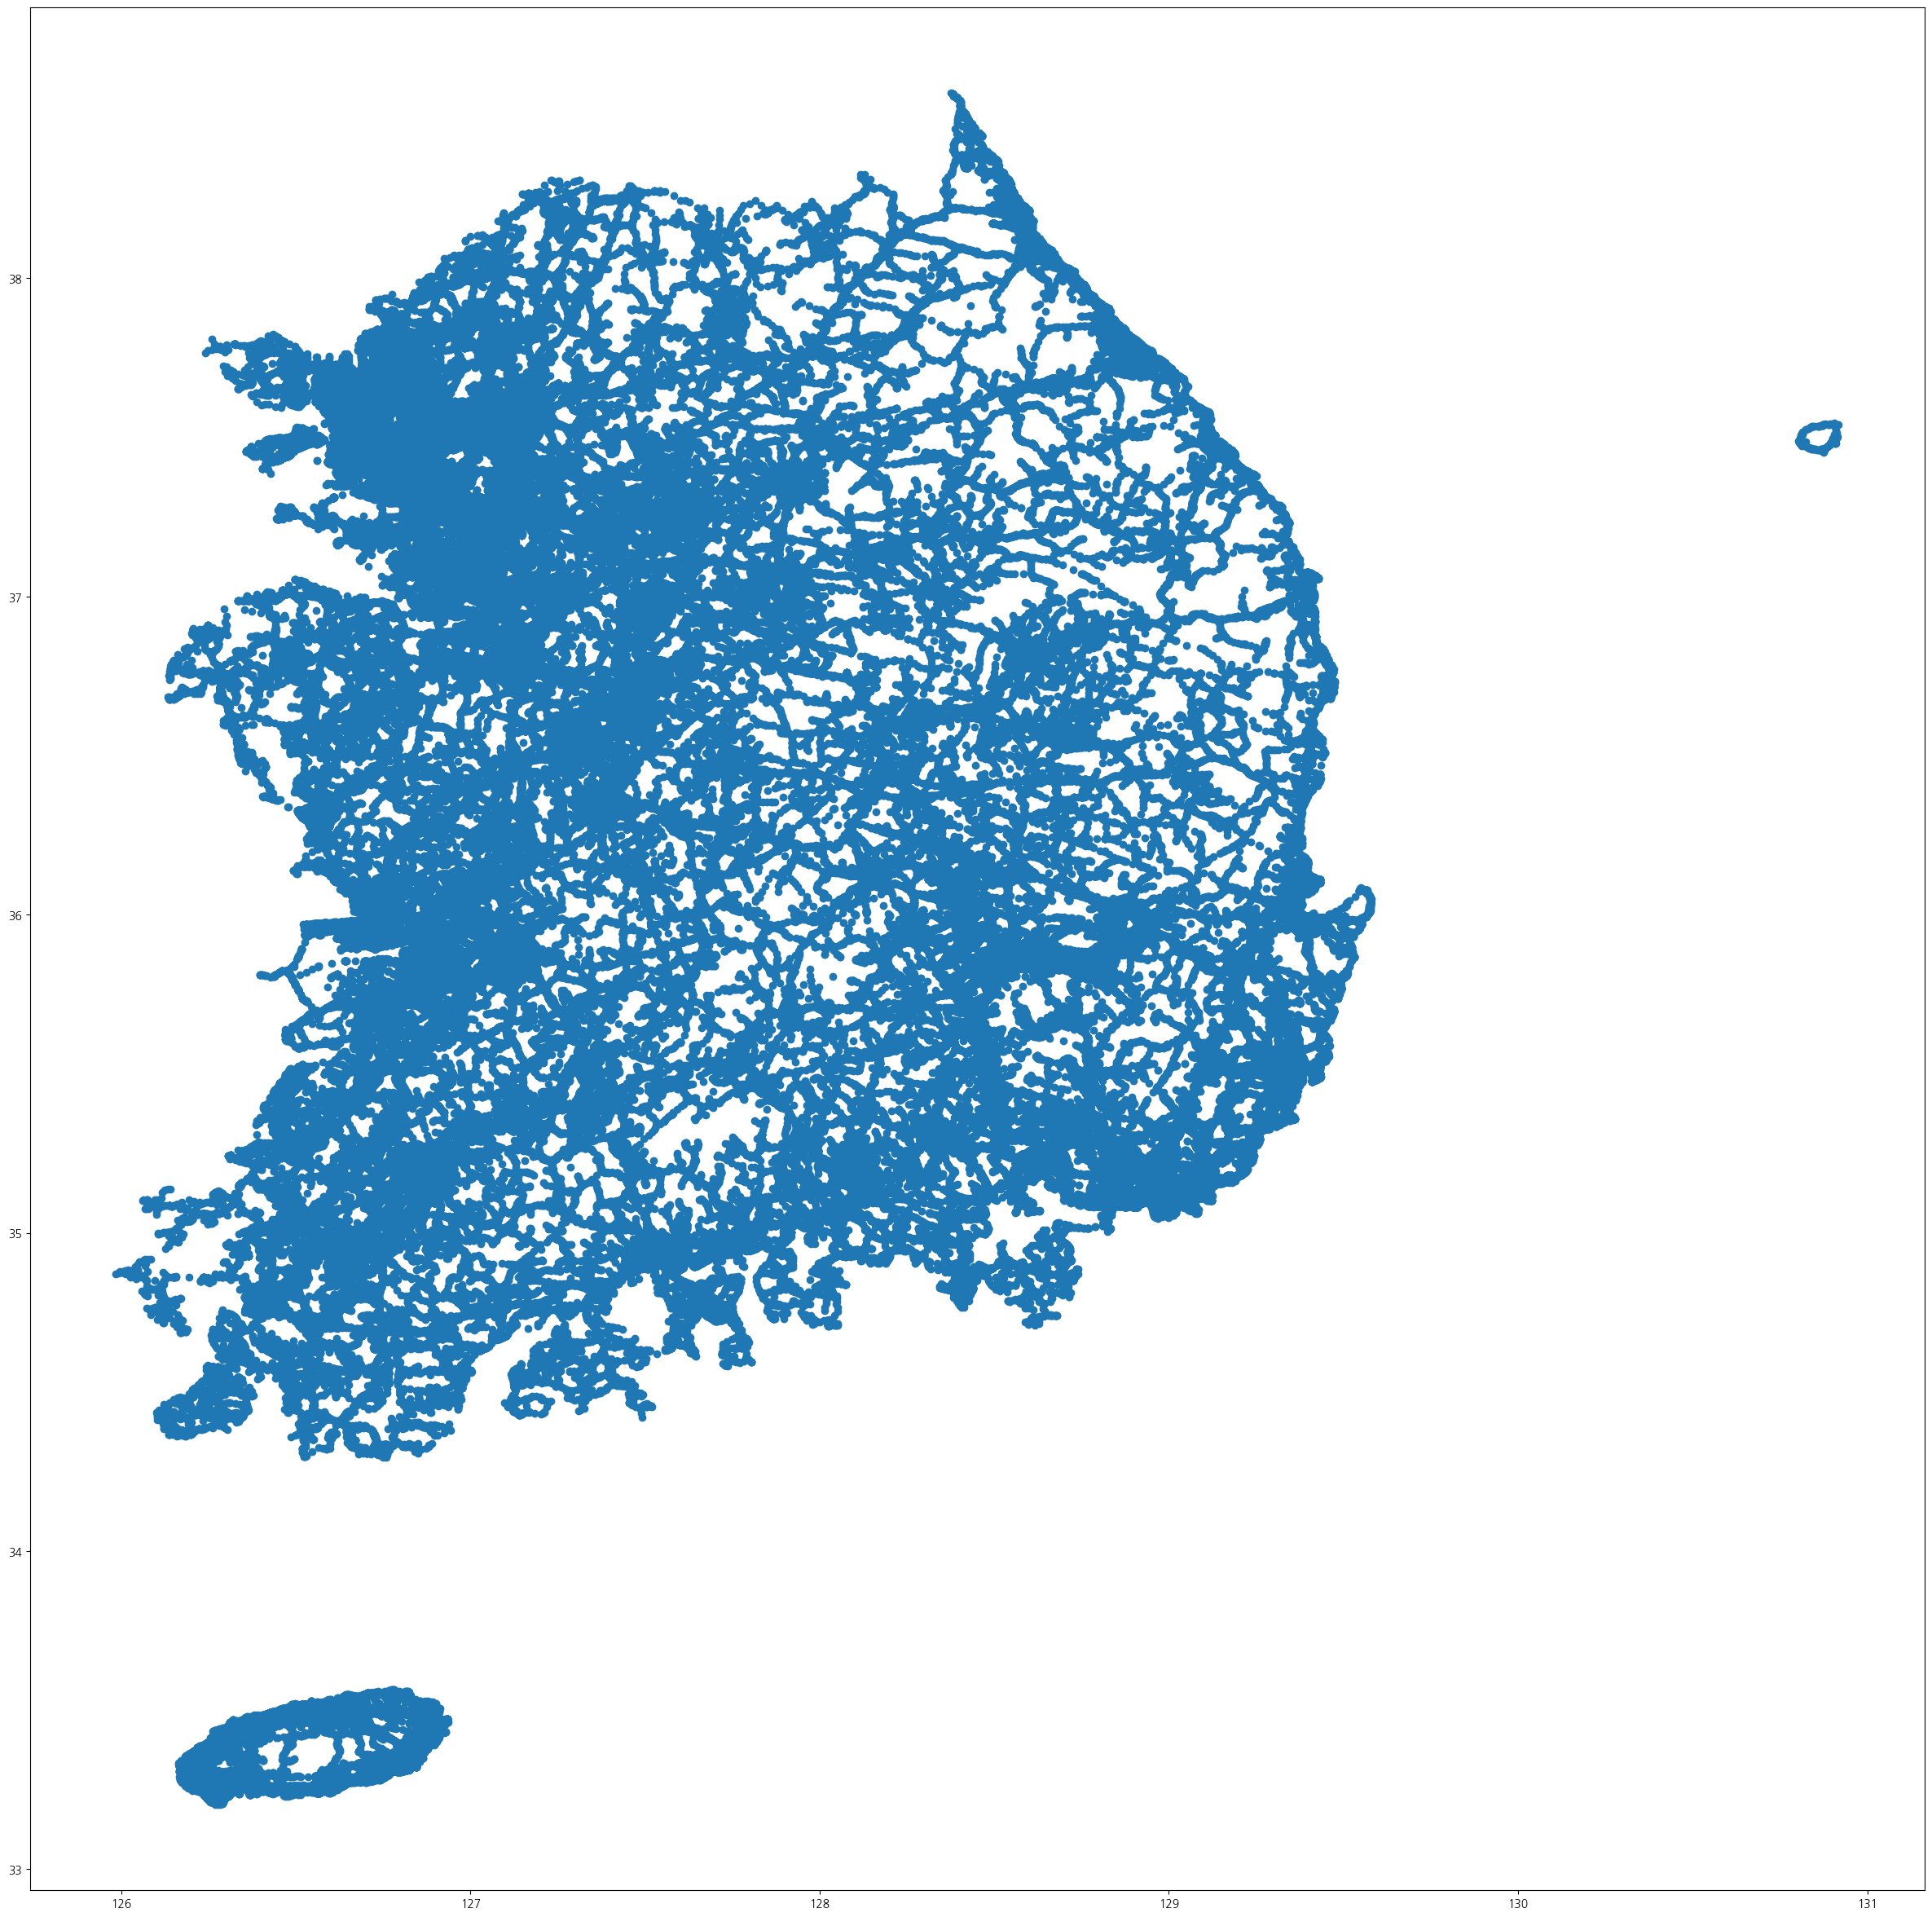

In [26]:
plt.figure(figsize=(30,30))
plt.scatter(x=road.X, y=road.Y)

In [3]:
cat = cat[['key','decimalLatitude','decimalLongitude','stateProvince','year','month','day']]
hydropotes = hydropotes[['key','decimalLatitude','decimalLongitude','stateProvince','year','month','day']]
racoon = racoon[['key','decimalLatitude','decimalLongitude','stateProvince','year','month','day']]

In [4]:
cat = cat.dropna(subset = 'stateProvince')
cat['stateProvince'].value_counts()

hydropotes['stateProvince'].value_counts()

racoon['stateProvince'] = racoon['stateProvince'].fillna('Jeollabuk-do')
racoon['stateProvince'].value_counts()

stateProvince
Jeollabuk-do         46
Gyeongsangbuk-do     38
Gangwon-do           31
강원도                  29
Chungcheongbuk-do    27
Chungcheongnam-do    24
Jeollanam-do         21
경상북도                 14
Gyeongsangnam-do     13
Gyeonggi-do          10
경상남도                  9
충청북도                  8
Gwangju               8
Incheon               7
전라북도                  6
Seoul                 4
경기도                   2
Daegu                 1
전라남도                  1
Sejong                1
Name: count, dtype: int64

In [5]:
racoon.loc[racoon['stateProvince'] == '강원도','stateProvince'] = 'Gangwon-do'
racoon.loc[racoon['stateProvince'] == '경상북도','stateProvince'] = 'Gyeongsangbuk-do'
racoon.loc[racoon['stateProvince'] == '경상남도','stateProvince'] = 'Gyeongsangnam-do'
racoon.loc[racoon['stateProvince'] == '충청북도','stateProvince'] = 'Chungcheongbuk-do'
racoon.loc[racoon['stateProvince'] == '전라북도','stateProvince'] = 'Jeollabuk-do'
racoon.loc[racoon['stateProvince'] == '경기도','stateProvince'] = 'Gyeonggi-do'
racoon.loc[racoon['stateProvince'] == '전라남도','stateProvince'] = 'Jeollanam-do'

In [6]:
#decimalLongitude, decimalLatitude, coordinateUncertaintyInMeters
def animal(df):
    df = df.rename(columns={'decimalLongitude':'경도'})
    df = df.rename(columns={'decimalLatitude':'위도'})
    df = df[['위도','경도']]
    df = df.fillna(0)
    return df

In [7]:
cat = animal(cat)
hydropotes = animal(hydropotes)
racoon = animal(racoon)
cat['종분류'] = 2
hydropotes['종분류'] = 3
racoon['종분류'] = 1

In [8]:
replicate_rk = pd.DataFrame(columns=['본부명', '지사명', '노선명', '구간', '방향', '5km', '발생건수', '위도', '경도'])
for i in range(len(roadkill1)):
    num = roadkill1['발생건수'][i]
    for j in range(num):
        replicate_rk = pd.concat([replicate_rk, roadkill1.loc[[i]]], ignore_index=True)
replicate_rk['발생건수']=1
replicate_rk

ecopath['생태통로수']=1

In [9]:
merged_df = pd.merge(replicate_rk[['위도','경도','발생건수']], ecopath[['위도','경도','생태통로수']], on=['위도', '경도'], how='outer').fillna(0)
merged_df
merged_df.to_csv('./data/eco_rk_merged.csv',index=False)

In [10]:
final_animal= pd.merge(cat[['위도','경도','종분류']], hydropotes[['위도','경도','종분류']], on=['위도','경도','종분류'], how='outer').fillna(0)
final_animal= pd.merge(final_animal[['위도','경도','종분류']], racoon[['위도','경도','종분류']], on=['위도','경도','종분류'], how='outer').fillna(0)
final_animal.to_csv('./data/final_animal.csv',index=False)

In [11]:
final_merge= pd.merge(replicate_rk[['위도','경도','발생건수']], ecopath[['위도','경도','생태통로수']], on=['위도', '경도'], how='outer').fillna(0)
final_merge= pd.merge(final_merge, final_animal, on=['위도', '경도'], how='outer').fillna(0)
final_merge.to_csv('./data/final_merge.csv',index=False)

In [12]:
final_merge

,위도,경도,발생건수,생태통로수,종분류
0,37.340987,127.912591,1.0,0.0,0.0
1,37.340987,127.912591,1.0,0.0,0.0
2,37.340987,127.912591,1.0,0.0,0.0
3,37.340987,127.912591,1.0,0.0,0.0
4,37.340987,127.912591,1.0,0.0,0.0
...,...,...,...,...,...
1847,35.380038,127.381146,0.0,0.0,1.0
1848,35.388915,127.493202,0.0,0.0,1.0
1849,35.113058,128.969297,0.0,0.0,1.0
1850,34.486423,126.468668,0.0,0.0,1.0


In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 기본 스타일
## 폰트 설정 및 마이너스 부호 설정
plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #부호

plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 8

In [189]:
final_merge.corr()

,위도,경도,발생건수,생태통로수,종분류
위도,1.000000,0.190042,0.048322,-0.034833,0.076549
경도,0.190042,1.000000,-0.023689,0.113663,-0.174241
발생건수,0.048322,-0.023689,1.000000,-0.362931,-0.459002
생태통로수,-0.034833,0.113663,-0.362931,1.000000,-0.520536
종분류,0.076549,-0.174241,-0.459002,-0.520536,1.000000


<Axes: >

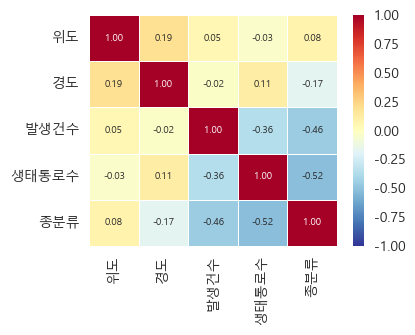

In [188]:
sns.heatmap(final_merge.corr(),annot=True, annot_kws={'size':7},\
                    cmap=plt.cm.RdYlBu_r, fmt=".2f", linewidth=.5,vmin=-1.0,square=False)

로드킬 少, 생태통로 多, 야생동물 少

In [164]:
eco_df = final_merge[['위도','경도','생태통로수']]
eco_df = eco_df[eco_df['생태통로수']>0]
not_eco_df = final_merge[['위도','경도','발생건수','종분류']]

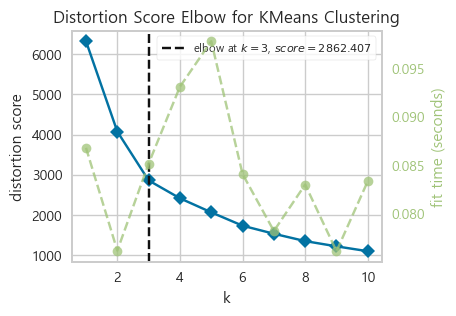

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [190]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

Elbow_Chart = KElbowVisualizer(model, k=(1,11))  #1~10까지 후보군을 두고 적절한 K를 찾음
Elbow_Chart.fit(final_merge)
Elbow_Chart.show()

eco_df -> n=4

not_eco_df -> n=3

실루엣 스코어(1에 근접해야 좋음): 0.40199762009114226


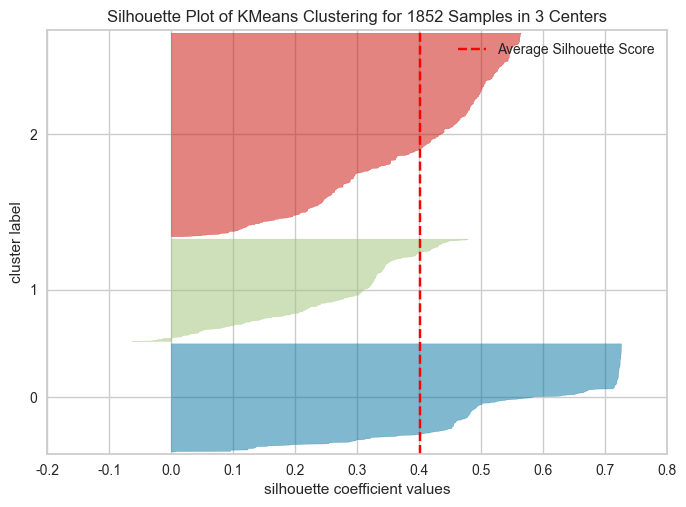

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1852 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [166]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=3) # 엘보우 차트에서 제안해준 k개수
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(not_eco_df)        # Fit the data to the visualizer

score = silhouette_score(not_eco_df, model.labels_)
print(f'실루엣 스코어(1에 근접해야 좋음): {score}')
visualizer.show()        # Finalize and render the figure

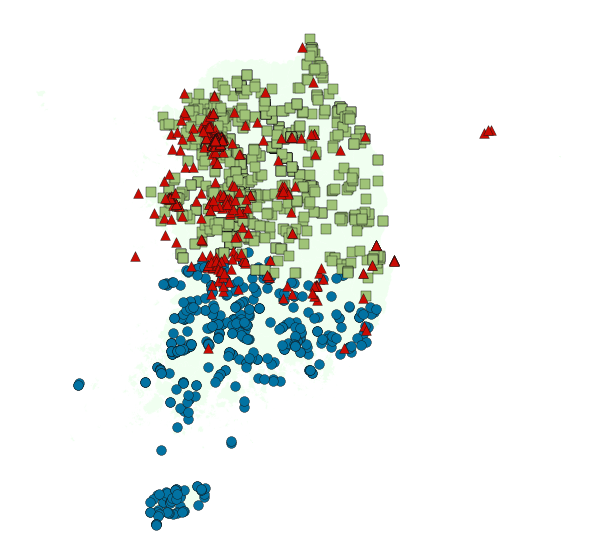

In [184]:
# K-Means 객체 생성
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=0)

# cluster label (fit 후 labels_, fit_predict의 결과가 같았다.)
cluster_labels = kmeans.fit_predict(not_eco_df.iloc[:,:-1])
not_eco_df["kmeans_label"] = cluster_labels

# 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_

# cluster 값 종류
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']
f,ax = plt.subplots(1,1,figsize=(10,7))

#gpd.GeoSeries(map_df.unary_union).boundary.plot(ax=ax, color='white')
map_df.plot(color='honeydew', ax=ax)
for cluster in unique_labels: 
    # 각 군집 시각화


    cluster_v = not_eco_df[not_eco_df['kmeans_label'] == cluster]    
    plt.scatter(x=cluster_v['경도'], y=cluster_v['위도'], edgecolor='k', marker=markers[cluster] )
    
    # # 군집별 중심 위치 시각화
    # center_xy = centers[cluster]
    
    # plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
    #             alpha=0.9, edgecolor='k', marker = markers[cluster])
    
    # plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k', 
    #             edgecolor='k', marker = f"${cluster}$")
    
ax.axis('off')    
plt.show()

In [177]:
not_eco_df[not_eco_df['kmeans_label']==0].describe() # 야생동물과 로드킬 모두 적음

,위도,경도,발생건수,종분류,kmeans_label
count,485.000000,485.000000,485.000000,485.000000,485.0
mean,35.137227,127.196416,0.156701,0.812371,0.0
std,0.782433,0.666569,0.363894,0.976930,0.0
min,33.113537,125.191948,0.000000,0.000000,0.0
25%,34.939167,126.660537,0.000000,0.000000,0.0
50%,35.281709,127.124167,0.000000,0.000000,0.0
75%,35.703028,127.560972,0.000000,2.000000,0.0
max,36.135000,128.969297,1.000000,3.000000,0.0


In [178]:
not_eco_df[not_eco_df['kmeans_label']==1].describe() # 야생동물 중간, 로드킬 중간

,위도,경도,발생건수,종분류,kmeans_label
count,972.000000,972.000000,972.000000,972.000000,972.0
mean,37.097657,127.201119,0.324074,1.083333,1.0
std,0.467392,0.348796,0.468269,1.289365,0.0
min,36.108987,126.022694,0.000000,0.000000,1.0
25%,36.716882,127.043532,0.000000,0.000000,1.0
50%,37.275544,127.164479,0.000000,0.000000,1.0
75%,37.431742,127.435501,1.000000,2.000000,1.0
max,38.163667,128.036012,1.000000,3.000000,1.0


In [183]:
not_eco_df[not_eco_df['kmeans_label']==2].describe() # 야생동물 많고 로드킬 발생 없는 곳

,위도,경도,발생건수,종분류,kmeans_label
count,484.000000,484.000000,484.0,484.000000,484.0
mean,37.016208,127.302309,0.0,2.619835,2.0
std,0.603543,0.688137,0.0,0.485930,0.0
min,35.095833,125.978082,0.0,2.000000,2.0
25%,36.707750,127.043985,0.0,2.000000,2.0
50%,37.364992,127.099884,0.0,3.000000,2.0
75%,37.433329,127.215916,0.0,3.000000,2.0
max,38.472176,130.905917,0.0,3.000000,2.0


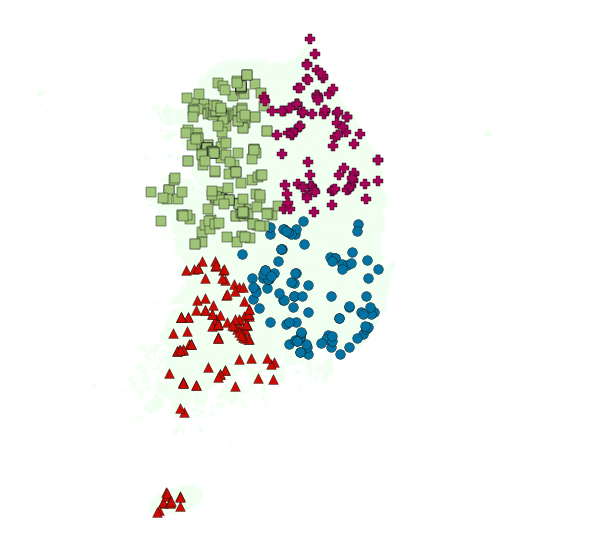

In [168]:
# K-Means 객체 생성
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=200, random_state=0)

# cluster label (fit 후 labels_, fit_predict의 결과가 같았다.)
cluster_labels = kmeans.fit_predict(eco_df.iloc[:,:-1])
eco_df["kmeans_label"] = cluster_labels

# 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_

# cluster 값 종류
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']
f,ax = plt.subplots(1,1,figsize=(10,7))

#gpd.GeoSeries(map_df.unary_union).boundary.plot(ax=ax, color='white')
map_df.plot(color='honeydew', ax=ax)
for cluster in unique_labels: 
    # 각 군집 시각화


    cluster_v = eco_df[eco_df['kmeans_label'] == cluster]    
    plt.scatter(x=cluster_v['경도'], y=cluster_v['위도'], edgecolor='k', marker=markers[cluster] )
    
    # # 군집별 중심 위치 시각화
    # center_xy = centers[cluster]
    
    # plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
    #             alpha=0.9, edgecolor='k', marker = markers[cluster])
    
    # plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k', 
    #             edgecolor='k', marker = f"${cluster}$")
    
ax.axis('off')    
plt.show()

In [173]:
eco_df[eco_df['kmeans_label']==0].describe()

,위도,경도,생태통로수,kmeans_label
count,101.000000,101.000000,101.0,101.0
mean,35.715853,128.379663,1.0,0.0
std,0.424586,0.500262,0.0,0.0
min,35.024547,127.463825,1.0,0.0
25%,35.345972,128.007194,1.0,0.0
50%,35.707475,128.262906,1.0,0.0
75%,36.036250,128.808506,1.0,0.0
max,36.520056,129.339583,1.0,0.0


In [174]:
eco_df[eco_df['kmeans_label']==1].describe()

,위도,경도,생태통로수,kmeans_label
count,211.000000,211.000000,211.0,211.0
mean,37.202659,127.198800,1.0,1.0
std,0.521200,0.340168,0.0,0.0
min,36.265583,126.205559,1.0,1.0
25%,36.756594,126.977836,1.0,1.0
50%,37.282083,127.181944,1.0,1.0
75%,37.683875,127.453875,1.0,1.0
max,38.163667,127.951528,1.0,1.0


In [175]:
eco_df[eco_df['kmeans_label']==2].describe()

,위도,경도,생태통로수,kmeans_label
count,123.000000,123.000000,123.0,123.0
mean,35.099626,127.036484,1.0,2.0
std,0.717370,0.400590,0.0,0.0
min,33.258783,126.288669,1.0,2.0
25%,34.866181,126.643667,1.0,2.0
50%,35.318142,127.101644,1.0,2.0
75%,35.474139,127.381900,1.0,2.0
max,36.072083,127.906667,1.0,2.0


In [176]:
eco_df[eco_df['kmeans_label']==3].describe()

,위도,경도,생태통로수,kmeans_label
count,105.000000,105.000000,105.0,105.0
mean,37.453241,128.514099,1.0,3.0
std,0.484104,0.353505,0.0,0.0
min,36.616895,127.770366,1.0,3.0
25%,36.930556,128.255583,1.0,3.0
50%,37.520859,128.467225,1.0,3.0
75%,37.827472,128.782261,1.0,3.0
max,38.558094,129.349833,1.0,3.0


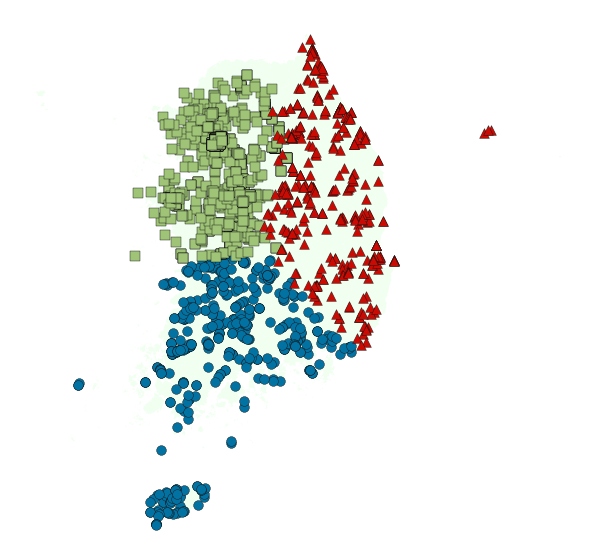

In [191]:
# K-Means 객체 생성
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=0)

# cluster label (fit 후 labels_, fit_predict의 결과가 같았다.)
cluster_labels = kmeans.fit_predict(final_merge.iloc[:,:-1])
final_merge["kmeans_label"] = cluster_labels

# 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_

# cluster 값 종류
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']
f,ax = plt.subplots(1,1,figsize=(10,7))

#gpd.GeoSeries(map_df.unary_union).boundary.plot(ax=ax, color='white')
map_df.plot(color='honeydew', ax=ax)
for cluster in unique_labels: 
    # 각 군집 시각화


    cluster_v = final_merge[final_merge['kmeans_label'] == cluster]    
    plt.scatter(x=cluster_v['경도'], y=cluster_v['위도'], edgecolor='k', marker=markers[cluster] )
    
    # # 군집별 중심 위치 시각화
    # center_xy = centers[cluster]
    
    # plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
    #             alpha=0.9, edgecolor='k', marker = markers[cluster])
    
    # plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k', 
    #             edgecolor='k', marker = f"${cluster}$")
    
ax.axis('off')    
plt.show()

In [192]:
final_merge[final_merge['kmeans_label']==0].describe()
# 로드킬 적음, 생태통로 많음, 동물 많음

,위도,경도,발생건수,생태통로수,종분류,kmeans_label
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.0
mean,35.127604,127.198284,0.158333,0.364583,0.793750,0.0
std,0.780665,0.666086,0.365434,0.481815,0.963403,0.0
min,33.113537,125.191948,0.000000,0.000000,0.000000,0.0
25%,34.925479,126.659564,0.000000,0.000000,0.000000,0.0
50%,35.267300,127.128038,0.000000,0.000000,0.000000,0.0
75%,35.679998,127.561490,0.000000,1.000000,2.000000,0.0
max,36.148742,128.969297,1.000000,1.000000,3.000000,0.0


In [193]:
final_merge[final_merge['kmeans_label']==1].describe() # 로드킬 많음, 생태통로 적음, 동물 많음

,위도,경도,발생건수,생태통로수,종분류,kmeans_label
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.0
mean,37.093077,127.206084,0.331638,0.211597,1.084435,1.0
std,0.470148,0.358162,0.471041,0.408649,1.289939,0.0
min,36.108987,125.978082,0.000000,0.000000,0.000000,1.0
25%,36.714611,127.043467,0.000000,0.000000,0.000000,1.0
50%,37.249148,127.164479,0.000000,0.000000,0.000000,1.0
75%,37.430470,127.437539,1.000000,0.000000,2.000000,1.0
max,38.163667,128.080709,1.000000,1.000000,3.000000,1.0


In [194]:
final_merge[final_merge['kmeans_label']==2].describe() # 로드킬 적음, 생태통로 많음, 동물 적음

,위도,경도,발생건수,생태통로수,종분류,kmeans_label
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.0
mean,36.942570,128.637326,0.120823,0.403599,0.717224,2.0
std,0.830507,0.469176,0.326341,0.491251,0.900880,0.0
min,35.125761,127.758752,0.000000,0.000000,0.000000,2.0
25%,36.249514,128.255583,0.000000,0.000000,0.000000,2.0
50%,36.918611,128.527307,0.000000,0.000000,0.000000,2.0
75%,37.545955,128.975278,0.000000,1.000000,1.000000,2.0
max,38.558094,130.905917,1.000000,1.000000,3.000000,2.0


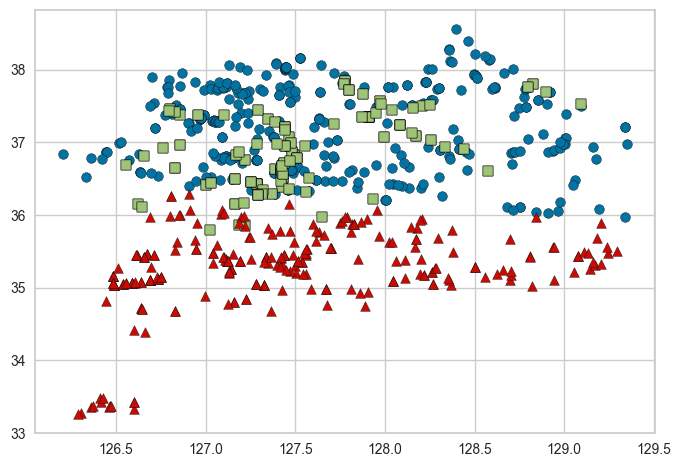

In [126]:
from sklearn.cluster import KMeans

# K-Means 객체 생성
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=0)

# cluster label (fit 후 labels_, fit_predict의 결과가 같았다.)
cluster_labels = kmeans.fit_predict(merged_df.iloc[:,:-1])
merged_df["kmeans_label"] = cluster_labels

# 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_

# cluster 값 종류
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']

for cluster in unique_labels: 
    # 각 군집 시각화
    cluster_v = merged_df[merged_df['kmeans_label'] == cluster]    
    plt.scatter(x=cluster_v['경도'], y=cluster_v['위도'], edgecolor='k', marker=markers[cluster] )
    
    # # 군집별 중심 위치 시각화
    # center_xy = centers[cluster]
    
    # plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
    #             alpha=0.9, edgecolor='k', marker = markers[cluster])
    
    # plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k', 
    #             edgecolor='k', marker = f"${cluster}$")
    
    
plt.show()